Linear Regression Model for Predicting Vehicle Fuel Efficiency:
The objective of this project was to develop a linear regression model to predict vehicle fuel efficiency, measured in miles per gallon (MPG), using the Auto MPG dataset(http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.dat).It includes various features related to vehicles, such as engine size, weight, horsepower, and other attributes.


Data Description:

mpg: Miles per gallon (target variable).
cylinders: Number of cylinders in the engine.

displacement: Engine displacement in cubic inches.

horsepower: Engine horsepower.

weight: Vehicle weight in pounds.

acceleration: Time taken to accelerate from 0 to 60 mph.

model_year: Model year of the vehicle.

origin: Origin of the car (coded as 1 for USA, 2 for Europe, 3 for Asia).

car_name: Car name (not used in the regression model).


In [19]:
import pandas as pd

# Load the dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
data = pd.read_csv(url, names=column_names, delim_whitespace=True)

# Inspect the dataset
print(data.head())
print(data.info())


    mpg  cylinders  displacement horsepower  weight  acceleration  model_year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                   car_name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2 

In [3]:
data.replace('?', pd.NA, inplace=True)
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')
data.dropna(inplace=True)

# Verify cleaning
print(data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car_name      392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB
None


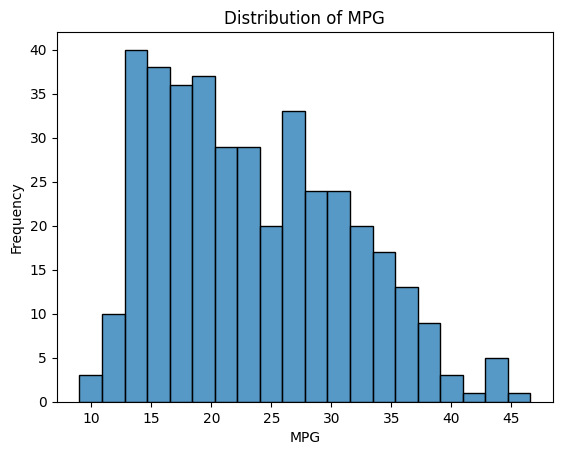

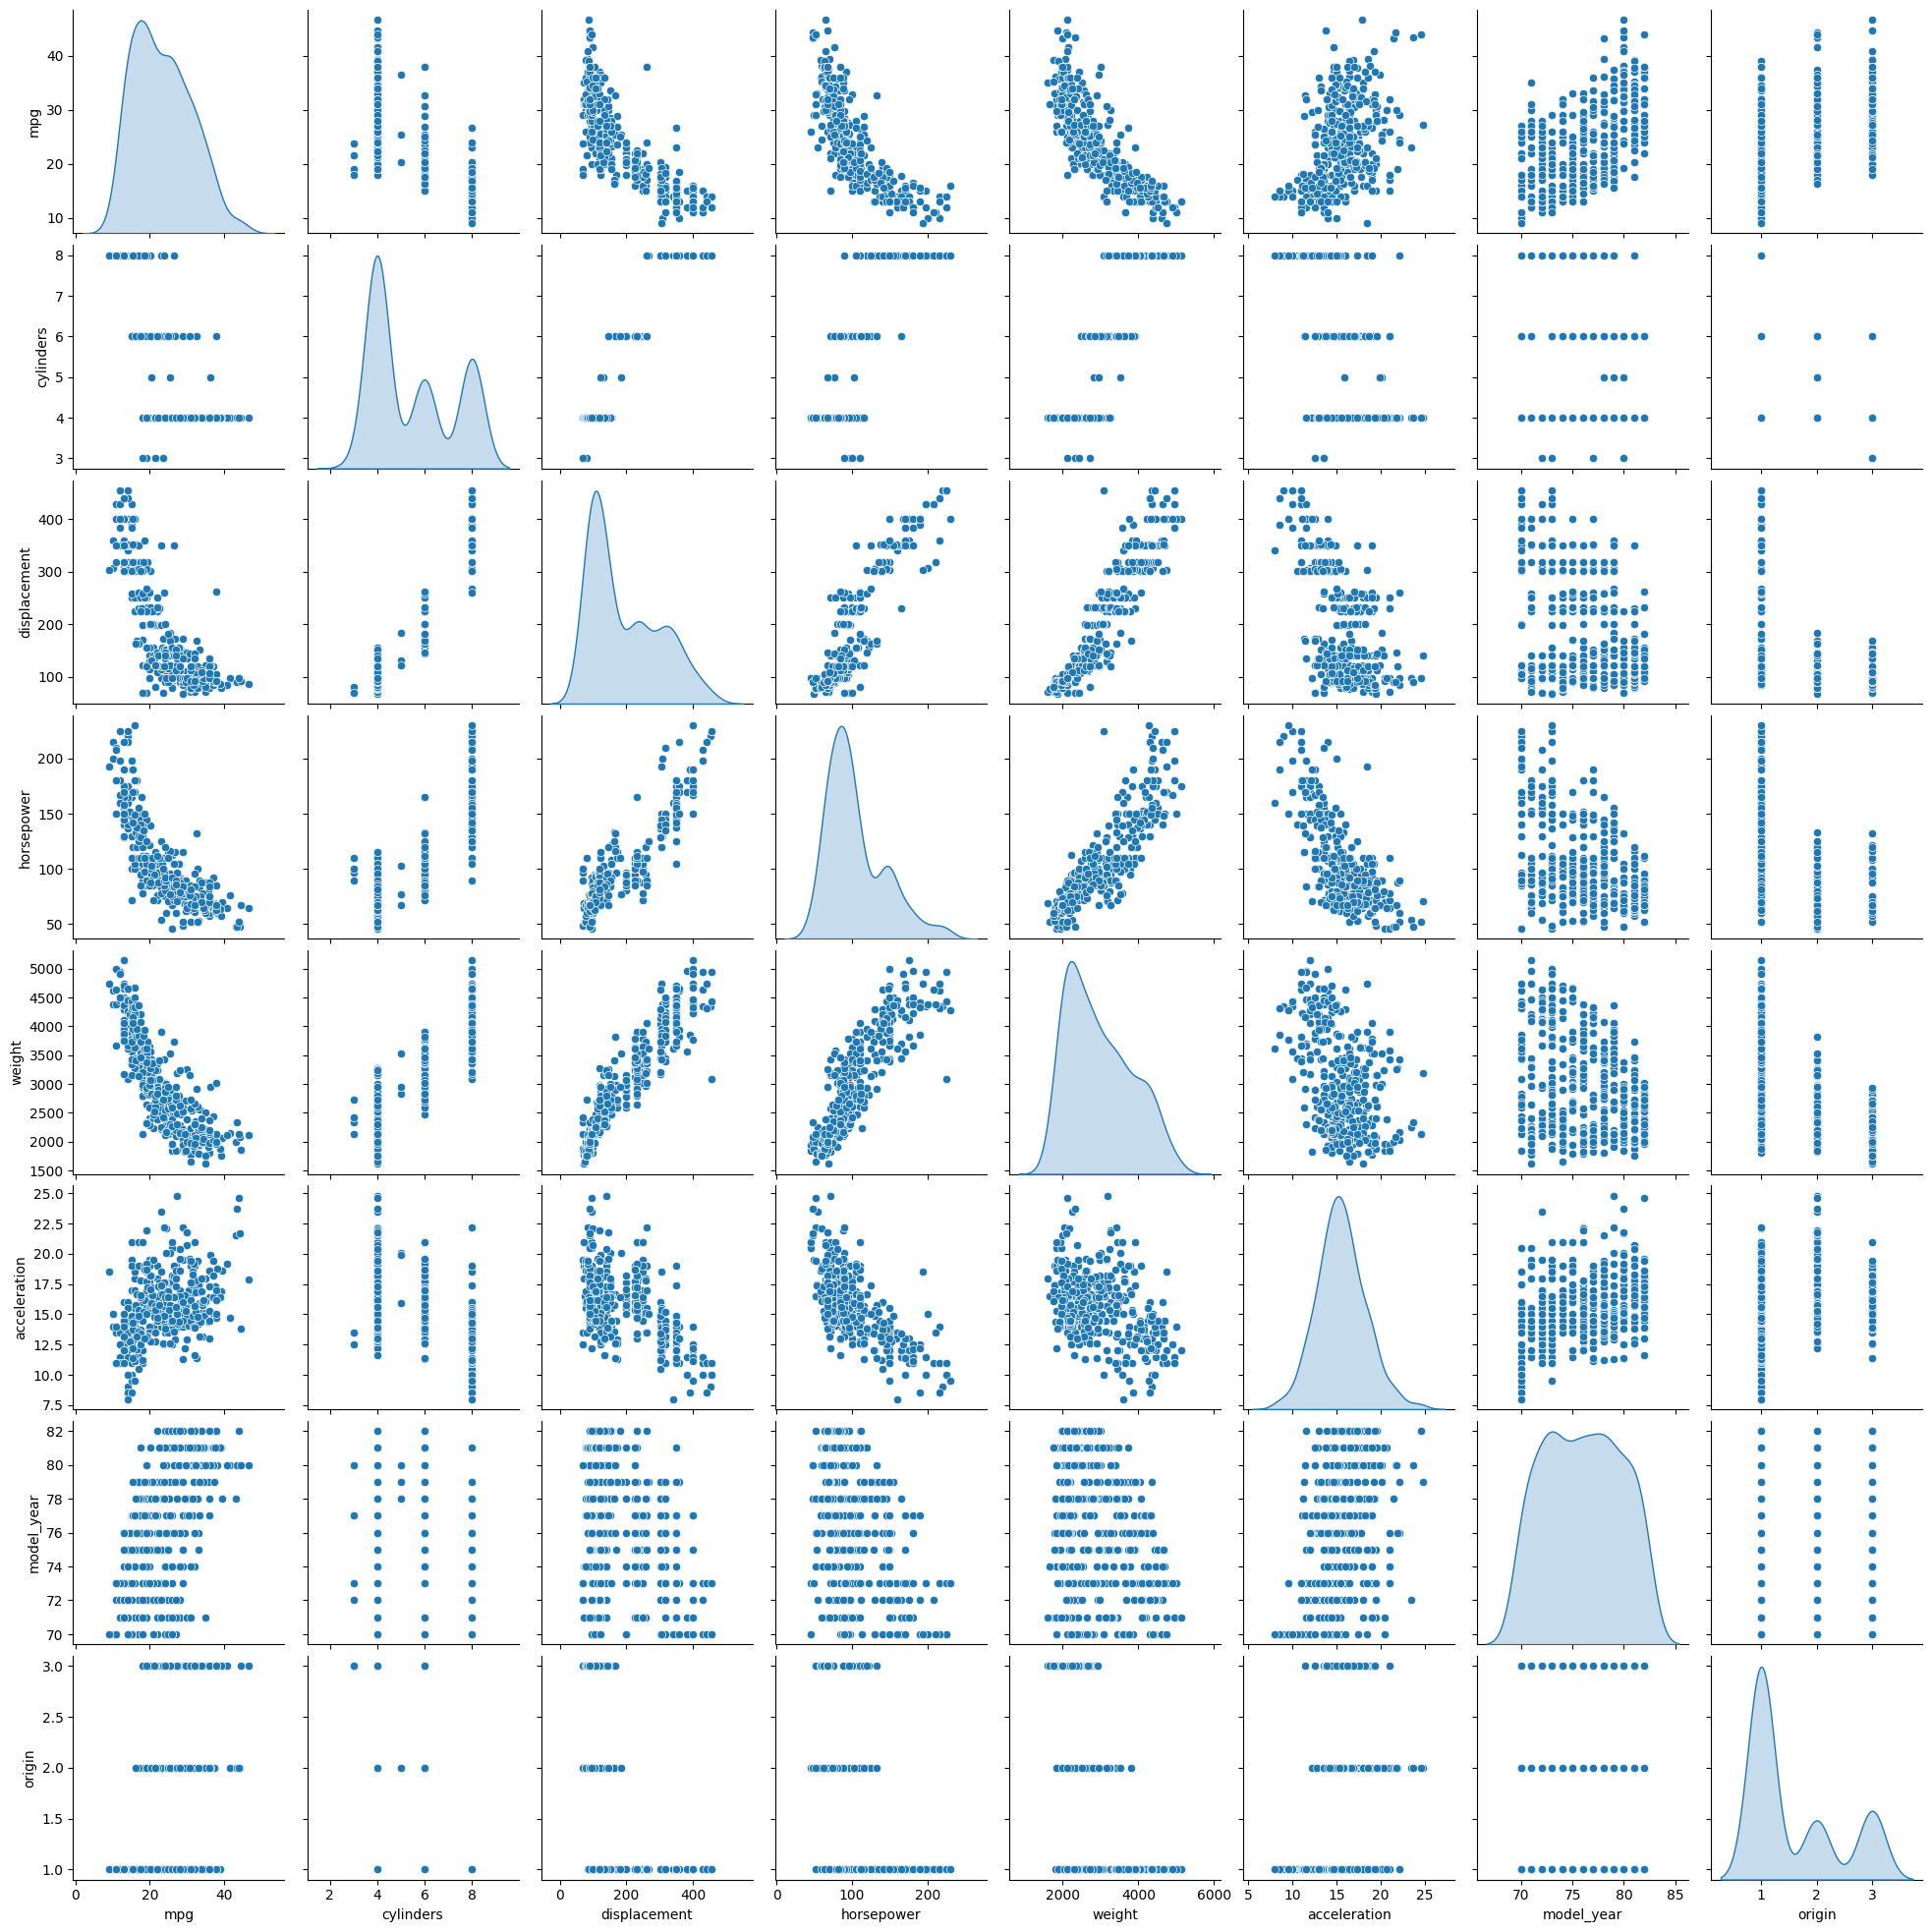

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of MPG
sns.histplot(data['mpg'], bins=20)
plt.title('Distribution of MPG')
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.show()

# Pairplot to see relationships
sns.pairplot(data, diag_kind='kde')
plt.show()


Feature Engineering
A new feature, power-to-weight ratio, was created by dividing horsepower by weight.
Features were standardized using StandardScaler to ensure they were on a similar scale

In [5]:
#With Acceleartion
data['power_to_weight'] = data['horsepower'] / data['weight']

# Inspect new feature
print(data.head())


    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   model_year  origin                   car_name  power_to_weight  
0          70       1  chevrolet chevelle malibu         0.037100  
1          70       1          buick skylark 320         0.044679  
2          70       1         plymouth satellite         0.043655  
3          70       1              amc rebel sst         0.043694  
4          70       1                ford torino         0.040591  


In [6]:
from sklearn.preprocessing import StandardScaler

features = data.drop(columns=['mpg', 'car_name'])
target = data['mpg']

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Convert back to DataFrame for easy inspection
features_scaled = pd.DataFrame(features_scaled, columns=features.columns)
print(features_scaled.head())


   cylinders  displacement  horsepower    weight  acceleration  model_year  \
0   1.483947      1.077290    0.664133  0.620540     -1.285258   -1.625315   
1   1.483947      1.488732    1.574594  0.843334     -1.466724   -1.625315   
2   1.483947      1.182542    1.184397  0.540382     -1.648189   -1.625315   
3   1.483947      1.048584    1.184397  0.536845     -1.285258   -1.625315   
4   1.483947      1.029447    0.924265  0.555706     -1.829655   -1.625315   

     origin  power_to_weight  
0 -0.716641         0.382496  
1 -0.716641         1.661177  
2 -0.716641         1.488456  
3 -0.716641         1.494892  
4 -0.716641         0.971505  


Model Development
The dataset was split into training and testing sets with an 80-20 split.
A linear regression model was trained using the training set.

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)


In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Model coefficients
print(model.coef_)
print(model.intercept_)


[ -0.28732432   0.60459568   7.302897   -11.15571109  -0.37783629
   2.68202847   1.28473581  -4.46554968]
23.513686435079713


The model's R-squared value indicates that approximately 80.18% of the variance in MPG can be explained by the model. The MSE reflects the average squared difference between the observed and predicted values, providing a measure of prediction accuracy.



In [16]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 10.181064569297234
R-squared: 0.8005300111589383


In [17]:
coefficients = pd.DataFrame({'Feature': features.columns, 'Coefficient': model.coef_})
print(coefficients)


           Feature  Coefficient
0        cylinders    -0.287324
1     displacement     0.604596
2       horsepower     7.302897
3           weight   -11.155711
4     acceleration    -0.377836
5       model_year     2.682028
6           origin     1.284736
7  power_to_weight    -4.465550


In [18]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, features_scaled, target, cv=5)
print(f'Cross-validated R-squared scores: {cv_scores}')
print(f'Mean CV R-squared score: {cv_scores.mean()}')


Cross-validated R-squared scores: [0.56711038 0.70113435 0.83267967 0.70880373 0.30519648]
Mean CV R-squared score: 0.6229849215192609


Score indicates that the model has moderate predictive power across different subsets of the data.



Conclusion<
The model provides a reasonably accurate prediction of vehicle fuel efficiency, with an R-squared value of 0.8017620872511122 and a mean squared error of 10.118178686956783. The cross-validated R-squared scores suggest that the model's performance varies across different subsets, with an average score of 0.6050064086466642.